In [1]:
#This notebook generates the data for Figure 6 of the main text.  Note that it takes some time to run all the 
#GST simulations (~3 hours on a modern laptop); users wishing to skip this step should simply 
#skip the data generation (beginning with "gsTrueList=[]") and just load the two pickle files instead.

In [1]:
import numpy as np
import pygsti
from pygsti.construction import std1Q_XYI
from matplotlib import pyplot as plt
%matplotlib inline
import pickle

In [2]:
import time

In [3]:
fiducials = std1Q_XYI.fiducials
germs = std1Q_XYI.germs
gs_target = std1Q_XYI.gs_target.copy()
gs_target.set_all_parameterizations('TP')

maxLengths_1024 = [0,1,2,4,8,16,32,64,128,256,512,1024]

stringLists = pygsti.construction.make_lsgst_lists(['Gi','Gx','Gy'],fiducials,fiducials,germs,maxLengths_1024)

In [4]:
runs = 100

In [5]:
#Don't run this cell if you want to load pre-computed data.
start = time.time()
gsTrueList = []
gsEstimatorList = []
for i in xrange(runs):
    print i
    gsTemp = gs_target.copy()
    gsTemp = gsTemp.rotate(max_rotate=0.01,seed=i)
    gsTemp = gsTemp.depolarize(spam_noise=0.01)
    DSTemp = pygsti.construction.generate_fake_data(gsTemp,stringLists[-1],50,sampleError='binomial',seed=i)
    results = pygsti.do_long_sequence_gst(DSTemp,gsTemp,fiducials,fiducials,germs,maxLengths_1024,advancedOptions={'verbosity':0})
    gsEstimatorList.append(results.gatesets['iteration estimates'])
    gsTrueList.append(gsTemp)
    del gsTemp, DSTemp
end = time.time()
print end - start

0


/home/kmrudin/pyGSTi/packages/pygsti/drivers/longsequence.py:219: UserWarning: 'verbosity' as an advanced option is deprecated. Please use the 'verbosity' argument directly.
  " Please use the 'verbosity' argument directly.")


1
2


3


4


5
6
7
8
9
10


11
12


13


14
15
16


17
18
19
20
21


22
23


24
25


26
27


28


29


30


31


32


33


34
35
36


37
38


39


40


41
42
43
44


45
46
47
48
49
50
51
52


53
54
55
56
57
58
59


60


61


62
63


64
65


66
67
68
69
70


71
72
73


74
75
76
77
78
79
80
81
82
83
84
85


86
87


88


89


90


91


92
93
94
95
96
97


98
99
9564.94869184


In [6]:
#Uncomment and run this cell if you want to save the data you just generated.

#EstimatorListFile = open('../ComputedObjects/Figure6-EstimatorLists.pkl','w')
#pickle.dump(gsEstimatorList,EstimatorListFile)
#EstimatorListFile.close()

#TrueGatesetListFile = open('../ComputedObjects/Figure6-TrueGatesetLists.pkl','w')
#pickle.dump(gsTrueList,TrueGatesetListFile)
#TrueGatesetListFile.close()

In [22]:
#Uncomment and run this cell if you want to load the data instead of taking the time to regenerate it.

#gsEstimatorList = pickle.load(open('../ComputedObjects/Figure6-EstimatorLists.pkl','r'))
#gsTrueList = pickle.load(open('../ComputedObjects/Figure6-TrueGatesetLists.pkl','r'))

In [7]:
start = time.time()
diamondArrayD = {}
runs = 100
for gate in ['Gx','Gy','Gi']:
    diamondArrayD[gate] = np.zeros([runs,len(maxLengths_1024[1:])],dtype='object')
for run in xrange(runs):
    print run
    gsTempTarg = gsTrueList[run]
    gsTempGOList = [pygsti.optimize_gauge(gsEstimatorList[run][k],'target',targetGateset=gsTempTarg,constrainToTP=True,spamWeight=0,targetGatesMetric='frobenius') for k in np.arange(1,12)]
    for gate in ['Gx','Gy','Gi']:
        diamondArrayD[gate][run,:] = np.array([pygsti.diamonddist(gsTempTarg[gate],gsTempGOList[m][gate]) for m in np.arange(11)]) 
end = time.time()
print end - start

0


/home/kmrudin/pyGSTi/packages/pygsti/algorithms/gaugeopt.py:278: UserWarning: The function 'optimize_gauge' is deprecated, and may be removed in future versions of pyGSTi
  " and may be removed in future versions of pyGSTi")


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
256.43076992


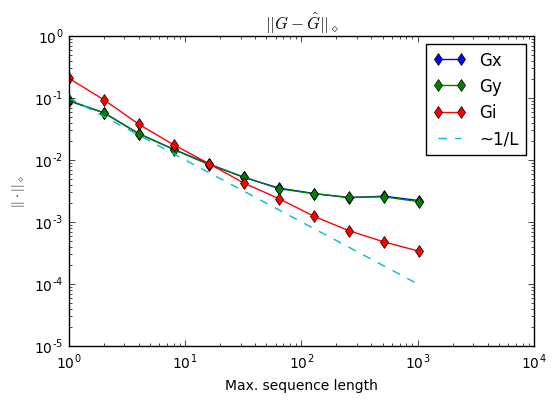

In [10]:
#This is a reproduction of Figure 6 (in publication made in DataGraph)
for gate in ['Gx','Gy','Gi']:
    plt.loglog(maxLengths_1024[1:],np.mean(diamondArrayD[gate],axis=0),'-d',label=gate)
plt.loglog(maxLengths_1024[1:],1e-1/np.array(maxLengths_1024[1:]),'--',label="~1/L")
plt.xlabel('Max. sequence length')
plt.ylabel(r'$||\cdot||_\diamond$')
plt.title(r'$||G-\hat{G}||_\diamond$')
plt.legend()
plt.savefig('../Figures/Fig6.pdf')
plt.show()

In [11]:
print "L\tGx\t\t\tGy\t\t\tGi"
for i, L in enumerate(maxLengths_1024[1:]):
    print L, '\t', np.mean(diamondArrayD['Gx'],axis=0)[i], '\t', np.mean(diamondArrayD['Gy'],axis=0)[i], '\t', np.mean(diamondArrayD['Gi'],axis=0)[i]

L	Gx			Gy			Gi
1 	0.0895866524424 	0.0912515415073 	0.206601371457
2 	0.0575006149328 	0.0573984526124 	0.093233314948
4 	0.0265210586797 	0.0263199073099 	0.0374777979911
8 	0.0147575190426 	0.0147180937022 	0.0174303593793
16 	0.00861670215452 	0.00838759904419 	0.00871850031452
32 	0.00522443995136 	0.00530734203349 	0.00422981719063
64 	0.00351780416532 	0.00343210948064 	0.00237537261637
128 	0.00287518315125 	0.00285306505372 	0.00123395491402
256 	0.00245511927441 	0.00249809668282 	0.000721514560908
512 	0.00260577698488 	0.00254239243537 	0.000475924628209
1024 	0.00220977102692 	0.00212334691599 	0.000337774301966
